In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms

import cv2
import numpy as np

from src.models.modnet import MODNet
from PIL import Image

In [8]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

In [9]:
img = cv2.imread('/home/ubuntu/data/yong/projects/MODNet/jk01.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.resize(img, (512, 512), interpolation=cv2.INTER_LINEAR)

In [10]:
img[0:55, :].shape

(55, 512, 3)

In [11]:
img = torch.from_numpy(img.astype(np.float32)).permute(2, 0, 1)

img = img / 255.0
img = normalize(img)

In [12]:
img[0:511].shape

torch.Size([3, 512, 512])

In [13]:
modnet = MODNet(backbone_pretrained=False)
modnet = nn.DataParallel(modnet)

In [14]:
modnet = modnet.cuda()
modnet.load_state_dict(torch.load('/home/ubuntu/data/yong/projects/MODNet/output/matting_0322.ckpt'))

<All keys matched successfully>

In [15]:
modnet.eval()

DataParallel(
  (module): MODNet(
    (backbone): MobileNetV2Backbone(
      (model): MobileNetV2(
        (features): Sequential(
          (0): Sequential(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): InvertedResidual(
            (conv): Sequential(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
              (3): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
          )
          (2): InvertedResidual(
            (conv): Sequential(
              (0): C

In [16]:
img = img[None, :, :, :]

In [17]:
_, _, matte = modnet(img.cuda(), True)

In [18]:
matte = matte[0][0].data.cpu().numpy()

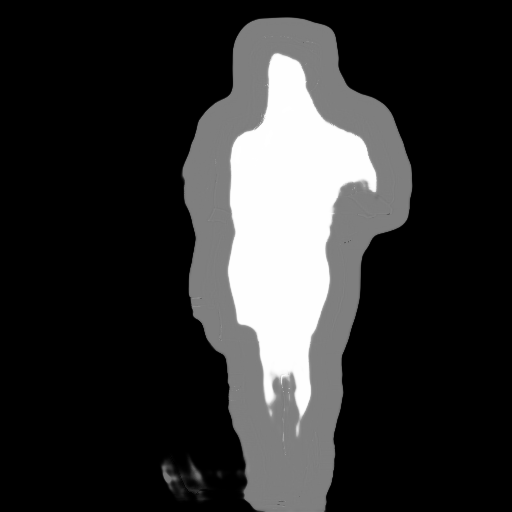

In [21]:
Image.fromarray(((matte * 255).astype('uint8')), mode='L')